In [3]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from ete3 import Tree


In [5]:

# Load the data
data_path = 'Supplimentary table 2 atlas paper.csv'
data = pd.read_csv(data_path, delimiter=';')

data.head()


,Unnamed: 0,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
0,AAK1,"0,072","0,0245","0,0284","0,0456","0,0425","0,0425","0,0951","0,1554","0,0993",...,"0,056","0,0831","0,0928","0,0635","0,0592","0,0389","0,0457","0,0251","0,0251","0,027"
1,ACVR2A,"0,0415","0,0481","0,0584","0,0489","0,0578","0,0578","0,0598","0,0625","0,0596",...,"0,0573","0,0527","0,0491","0,0616","0,0556","0,064","0,064","0,0703","0,0703","0,0589"
2,ACVR2B,"0,0533","0,0517","0,0566","0,0772","0,0533","0,0533","0,0543","0,0442","0,0471",...,"0,0561","0,0451","0,0486","0,0585","0,0532","0,073","0,0697","0,0761","0,0761","0,0637"
3,AKT1,"0,0603","0,0594","0,0552","0,0605","0,0516","0,0516","0,0427","0,0435","0,0464",...,"0,0663","0,1145","0,1082","0,0735","0,0649","0,0443","0,0312","0,0393","0,0393","0,0263"
4,AKT2,"0,0602","0,0617","0,0643","0,0582","0,0534","0,0534","0,0433","0,0418","0,0493",...,"0,0679","0,1155","0,099","0,0652","0,0623","0,0362","0,035","0,0548","0,0548","0,0417"


In [7]:
data.columns

Index(['Unnamed: 0', '-5P', '-5G', '-5A', '-5C', '-5S', '-5T', '-5V', '-5I',
       '-5L',
       ...
       '4H', '4K', '4R', '4Q', '4N', '4D', '4E', '4s', '4t', '4y'],
      dtype='object', length=208)

In [33]:
# Convert numeric columns from string with commas to floats
data_numeric = data.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

# Select the first 20 columns for clustering
data_subset = data_numeric.iloc[:, 1:21]


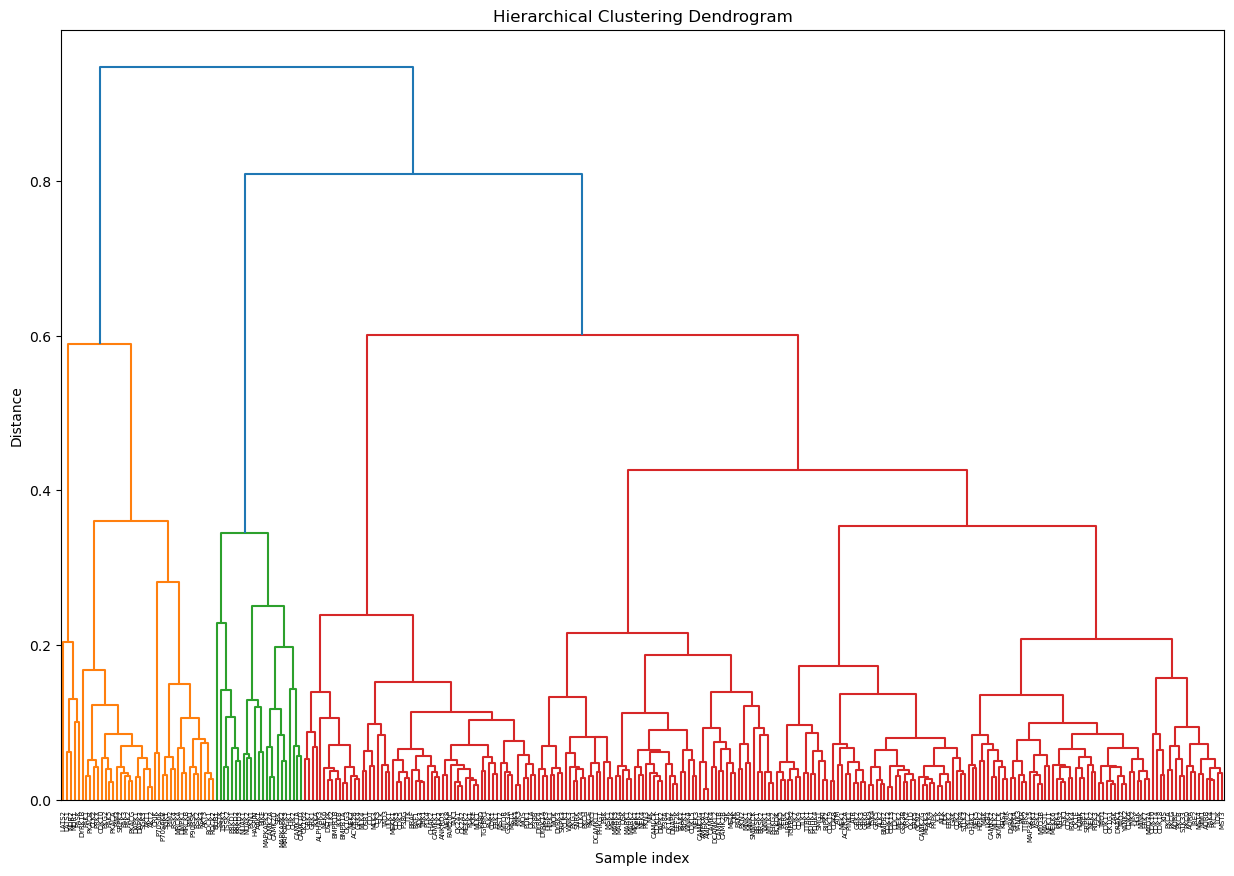

In [34]:

# Compute the linkage matrix using the first 20 columns
linkage_matrix = linkage(data_subset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=data['Unnamed: 0'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



In [35]:
data.dtypes

Unnamed: 0    object
-5P           object
-5G           object
-5A           object
-5C           object
               ...  
4D            object
4E            object
4s            object
4t            object
4y            object
Length: 208, dtype: object

In [39]:
!pip install ete3

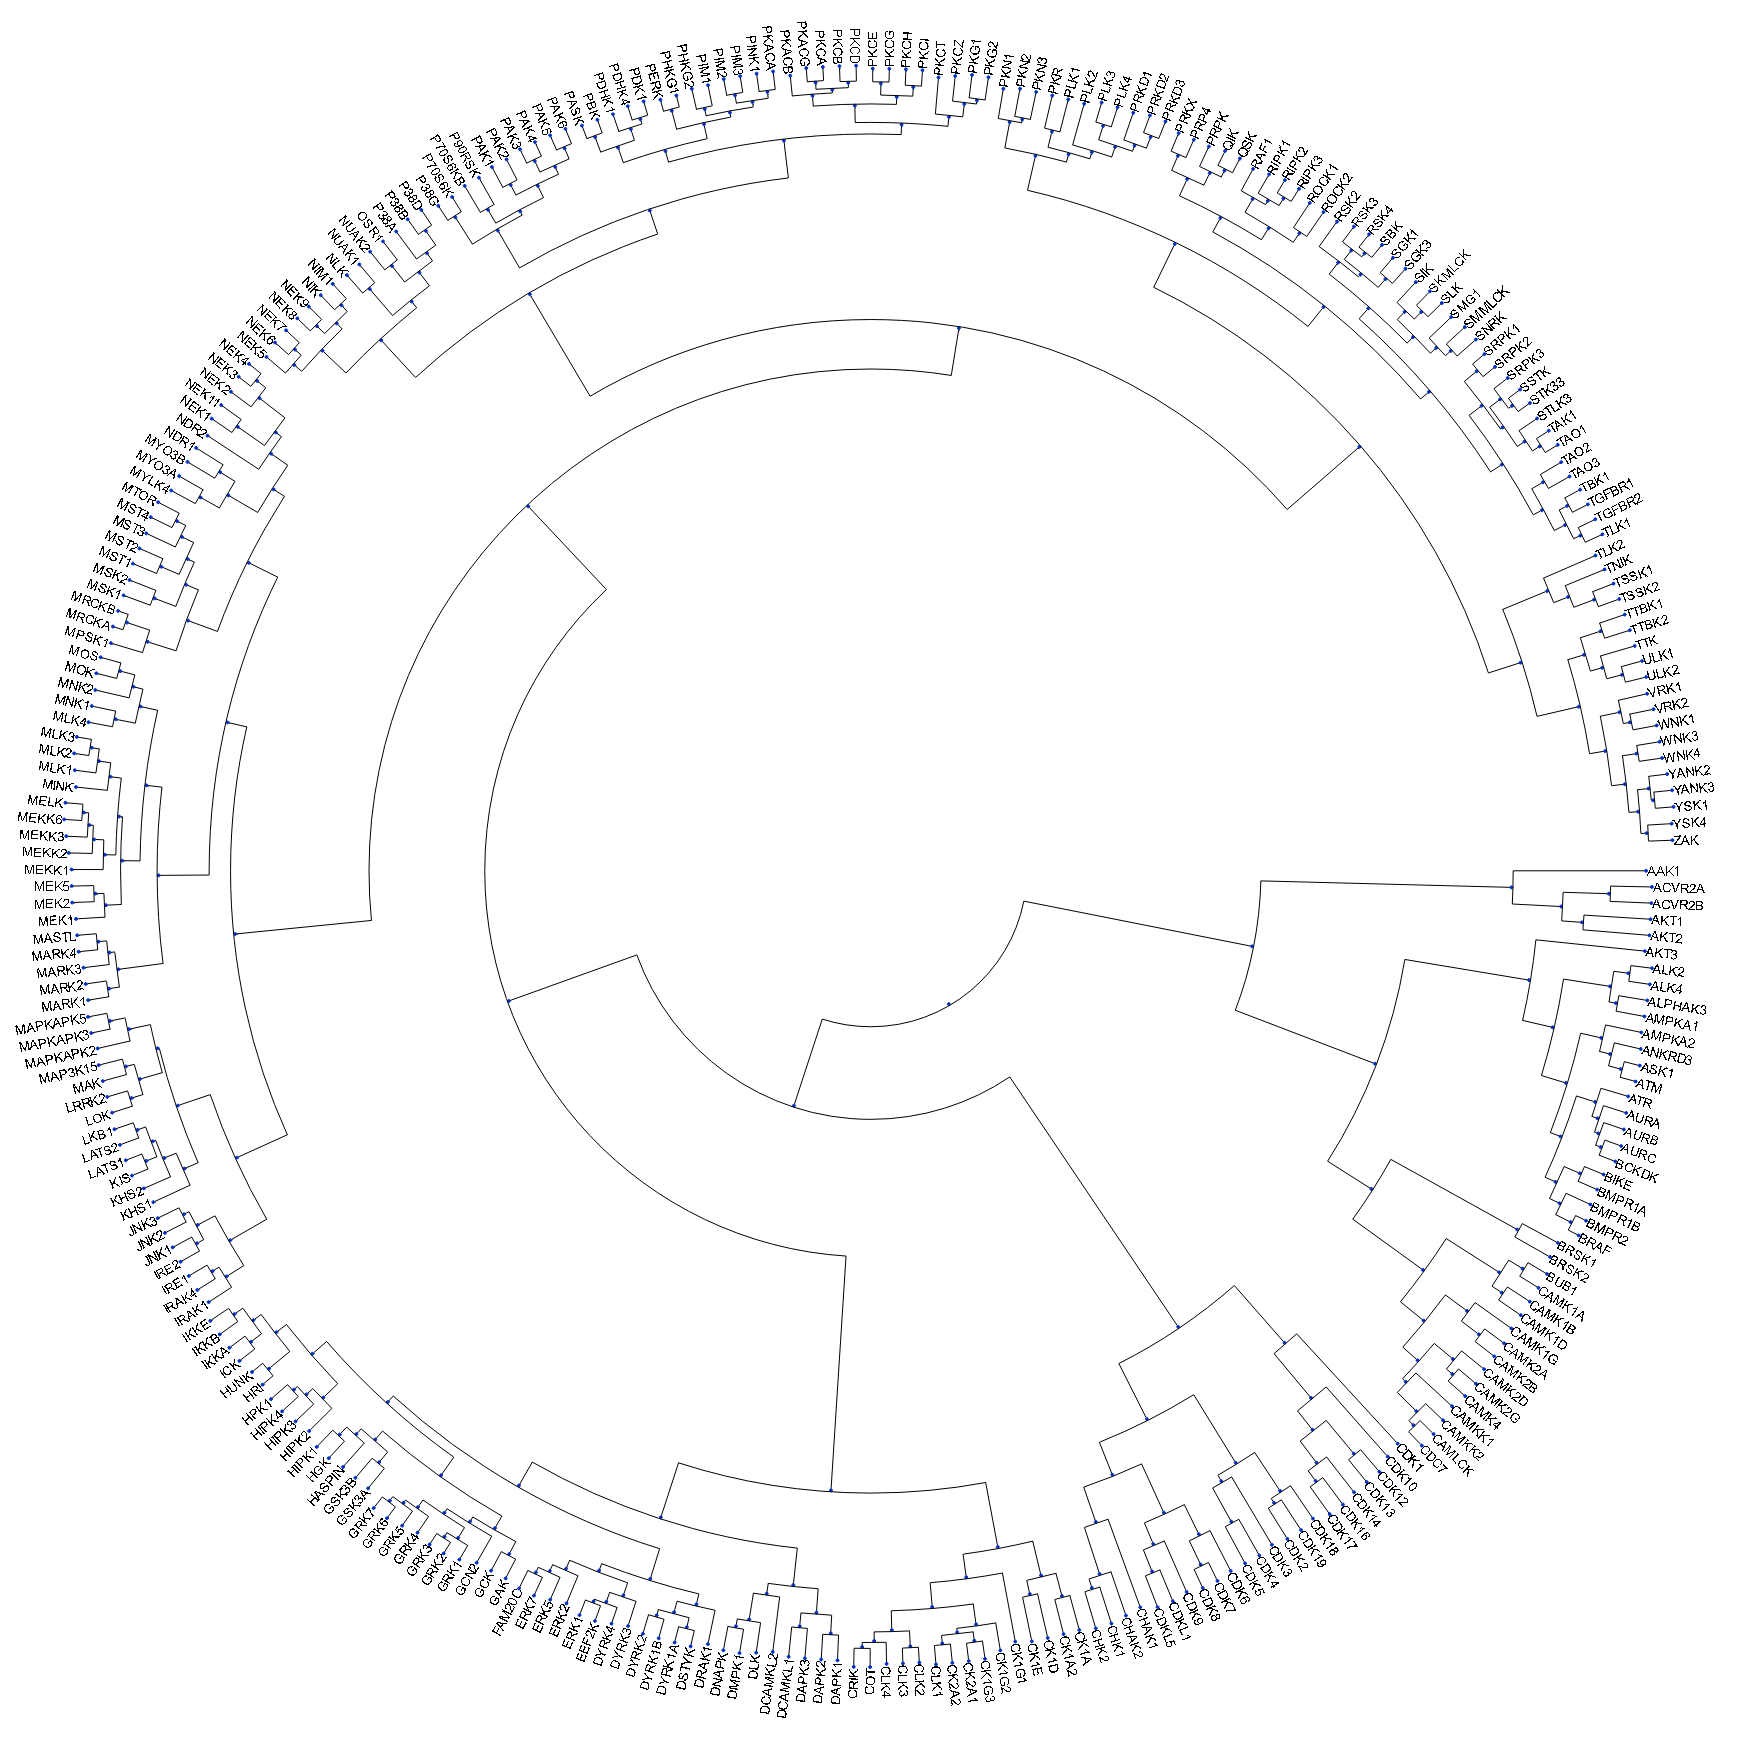

In [40]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
from ete3 import Tree, TreeStyle, faces, AttrFace

# Ensure the necessary libraries are installed
# !pip install scipy ete3 pandas matplotlib

# Reusing the previously computed linkage_matrix
# linkage_matrix = linkage(data_subset, method='ward') # Already computed

# Convert the linkage matrix to a Newick tree format
def convert_to_newick(linkage_matrix):
    def build_newick(node, parent_dist, leaf_names, newick=''):
        if node.is_leaf():
            return "%s:%f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
        else:
            if newick == '':
                newick = ');'
            else:
                newick = '):%f%s' % (parent_dist - node.dist, newick)
            newick = build_newick(node.get_right(), node.dist, leaf_names, newick)
            newick = build_newick(node.get_left(), node.dist, leaf_names, ',%s' % (newick))
            newick = '(%s' % (newick)
            return newick

    tree = to_tree(linkage_matrix)
    return build_newick(tree, tree.dist, list(map(str, range(len(data_subset)))))

newick_tree = convert_to_newick(linkage_matrix)

# Load the Newick tree using ete3
t = Tree(newick_tree)

# Add leaf names
for i, leaf in enumerate(t.iter_leaves()):
    leaf.name = data['Unnamed: 0'].values[i]

# Create a TreeStyle for circular layout
ts = TreeStyle()
ts.mode = "c"
ts.show_leaf_name = True
ts.show_scale = False

# Render the tree
t.render("%%inline", tree_style=ts)
